# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
# refer to python API's day 2 module 5

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [47]:
# Get weather data for one city to see API call output and determine what data elements to grab to build df and csv in later steps
# refer to python api day 2 module 3 for example 

weather_response = requests.get(query_url + "chicago")
weather_json = weather_response.json()

# view to json response
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 41.85, 'lon': -87.65},
 'dt': 1644074108,
 'id': 4887398,
 'main': {'feels_like': 9.57,
          'humidity': 72,
          'pressure': 1033,
          'temp': 9.57,
          'temp_max': 13.05,
          'temp_min': 4.33},
 'name': 'Chicago',
 'sys': {'country': 'US',
         'id': 2005153,
         'sunrise': 1644065929,
         'sunset': 1644102625,
         'type': 2},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 277, 'gust': 4, 'speed': 1.99}}


In [48]:
#set up lists to grab data from api for use later
# refer to API documentation to grab the necessary elements from the API call
# API documentation = https://openweathermap.org/current
# refer to python api day 2 module 1 for how to grab elements from the API call

city_number = []
city_name = []
city_lat = []
city_lng = []
city_temp_max = []
city_humidity = []
city_cloudiness = []
city_wind_speed = []
city_country = []
city_date = []

In [49]:
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city_number_api = response["id"]
        city_number.append(city_number_api)
        
        city_name_api = response["name"]
        city_name.append(city_name_api)
        
        city_lat_api = response["coord"]["lat"]
        city_lat.append(city_lat_api)
        
        city_lng_api = response["coord"]["lon"]
        city_lng.append(city_lng_api)
        
        city_temp_max_api = response["main"]["temp_max"]
        city_temp_max.append(city_temp_max_api)
        
        city_humidity_api = response["main"]["humidity"]
        city_humidity.append(city_humidity_api)
        
        city_cloudiness_api = response["clouds"]["all"]
        city_cloudiness.append(city_cloudiness_api)
        
        city_wind_speed_api = response["wind"]["speed"]
        city_wind_speed.append(city_wind_speed_api)
        
        city_country_api = response["sys"]["country"]
        city_country.append(city_country_api)
        
        city_date_api = response["dt"]
        city_date.append(city_date_api)
        
        print(f"The city number is: {city_number_api}, the city name is: {city_name_api}")
        
    except:
        print(f"{city} not found")
               

mys shmidta not found
The city number is: 5367788, the city name is: Lompoc
The city number is: 1337613, the city name is: Kulhudhuffushi
The city number is: 964432, the city name is: Port Alfred
The city number is: 2436400, the city name is: Ati
nizhneyansk not found
The city number is: 2156643, the city name is: Mount Gambier
The city number is: 6170031, the city name is: Tuktoyaktuk
The city number is: 3471451, the city name is: Arraial do Cabo
The city number is: 4020109, the city name is: Atuona
The city number is: 5848280, the city name is: Kapaa
The city number is: 2206939, the city name is: Bluff
The city number is: 3430863, the city name is: Mar del Plata
The city number is: 933726, the city name is: Tshane
The city number is: 3393536, the city name is: Olinda
The city number is: 6201424, the city name is: Mataura
The city number is: 3181526, the city name is: Province of Brindisi
The city number is: 2019118, the city name is: Nizhniy Tsasuchey
The city number is: 3547867, the

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
#finish with the code and labels (change varibale to correct column names as required)

weather_dict = pd.DataFrame({
    "City": city_name,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_temp_max,
    "Humidity": city_humidity,
    "Cloudiness": city_cloudiness,
    "Wind Speed": city_wind_speed,
    "Country": city_country,
    "Date": city_date
})
weather_dict
    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lompoc,34.6391,-120.4579,54.12,79,0,4.61,US,1644074478
1,Kulhudhuffushi,6.6221,73.0700,80.87,70,25,11.41,MV,1644074491
2,Port Alfred,-33.5906,26.8910,70.05,83,98,23.62,ZA,1644074542
3,Ati,13.2154,18.3353,85.06,10,7,12.84,TD,1644074492
4,Mount Gambier,-37.8333,140.7667,61.75,67,94,8.03,AU,1644074543
...,...,...,...,...,...,...,...,...,...
560,Riohacha,11.5444,-72.9072,86.11,54,40,11.50,CO,1644074727
561,Porbandar,21.6422,69.6093,69.24,61,0,6.78,IN,1644074727
562,Port-Cartier,50.0334,-66.8654,3.74,73,100,6.73,CA,1644074727
563,Winnemucca,40.9730,-117.7357,33.28,45,76,1.74,US,1644074728


In [67]:
# Export city data to a CSV
weather_dict.to_csv("Output/city_weather_data.csv", encoding="utf-8", index=False)

In [68]:
# https://stackoverflow.com/questions/57869926/what-are-25-50-75-values-when-we-describe-a-grouped-dataframe
weather_dict.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.743728,17.460020,50.332814,70.408850,57.010619,8.921841,1.644075e+09
std,33.814319,91.761813,33.921976,21.797609,39.840772,6.422901,8.783011e+01
min,-54.800000,-179.166700,-43.800000,5.000000,0.000000,0.000000,1.644074e+09
25%,-7.958900,-65.102300,26.960000,61.000000,15.000000,4.560000,1.644075e+09
50%,22.285500,23.433300,61.520000,74.000000,71.000000,7.160000,1.644075e+09
75%,48.400100,102.173900,78.460000,86.000000,99.000000,12.330000,1.644075e+09
max,78.218600,177.483300,97.050000,100.000000,100.000000,41.380000,1.644075e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# Review this section with the tutor to ensure I am understanding the instructions properly

In [70]:
weather_dict.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [77]:
# look at the unique humidity values and see if there are any values greater than 100
# No values greater than 100
weather_dict["Humidity"].unique()

array([ 79,  70,  83,  10,  67,  68,  62,  77,  59,  76,  88,  31,  58,
        98,  73,  92,  42,  63,  51,  50,  74,  78, 100,  94,  82,  90,
        66,  89,  44,  52,  95,  34,  60,  91,  80,  26,  75,  57,  41,
        99,  96,  84,   6,  35,  48,  69,  71,  64,  85,  36,  28,  54,
        93,  72,  33,  56,  97,  86,  87,  61,  24,   9,  81,  13,  39,
        65,  43,  37,  55,  49,  22,  40,  12,  47,  15,  23,  19,  32,
        11,  38,  46,  45,  20,   8,   5,  25,  53,  14], dtype=int64)

In [78]:
weather_dict.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.743728,17.460020,50.332814,70.408850,57.010619,8.921841,1.644075e+09
std,33.814319,91.761813,33.921976,21.797609,39.840772,6.422901,8.783011e+01
min,-54.800000,-179.166700,-43.800000,5.000000,0.000000,0.000000,1.644074e+09
25%,-7.958900,-65.102300,26.960000,61.000000,15.000000,4.560000,1.644075e+09
50%,22.285500,23.433300,61.520000,74.000000,71.000000,7.160000,1.644075e+09
75%,48.400100,102.173900,78.460000,86.000000,99.000000,12.330000,1.644075e+09
max,78.218600,177.483300,97.050000,100.000000,100.000000,41.380000,1.644075e+09


In [79]:
#  Get the indices of cities that have humidity over 100%.
# No indices with humidity over 100%


In [81]:
# step skipped due to no cities having a humidity that is over 100
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

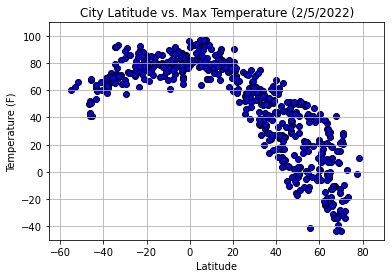

In [87]:
# add grid https://jonathansoma.com/lede/data-studio/matplotlib/adding-grid-lines-to-a-matplotlib-chart/

plt.scatter(city_lat, city_temp_max, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(-50,110)
plt.xlim(-65,90)
plt.title("City Latitude vs. Max Temperature (2/5/2022)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Output/Lat_vs_Temp_Plot.png")
plt.grid()
plt.show()

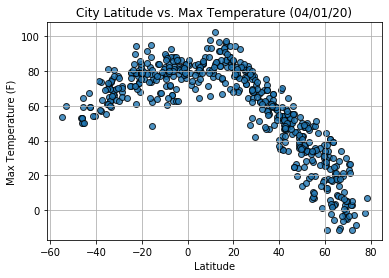

## Latitude vs. Humidity Plot

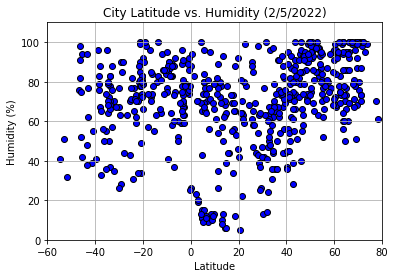

In [89]:
plt.scatter(city_lat, city_humidity, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(0,110)
plt.xlim(-60,80)
plt.title("City Latitude vs. Humidity (2/5/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Output/Lat_vs_Humidity_Plot.png")
plt.grid()
plt.show()

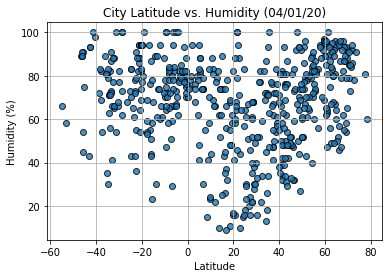

## Latitude vs. Cloudiness Plot

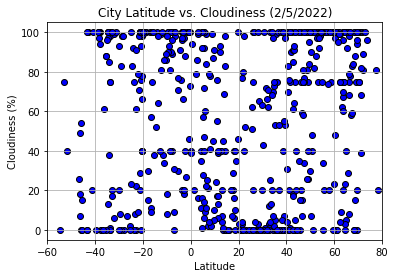

In [91]:
plt.scatter(city_lat, city_cloudiness, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(-5,105)
plt.xlim(-60,80)
plt.title("City Latitude vs. Cloudiness (2/5/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Output/Lat_vs_Cloudiness_Plot.png")
plt.grid()
plt.show()

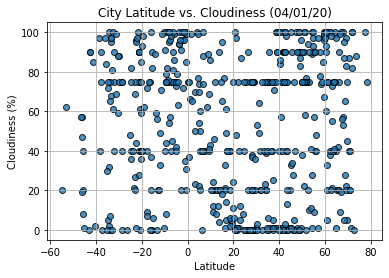

## Latitude vs. Wind Speed Plot

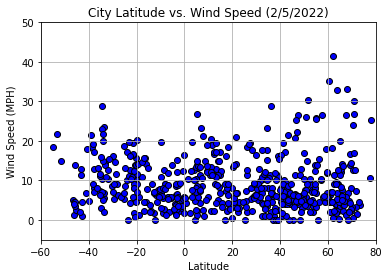

In [93]:
plt.scatter(city_lat, city_wind_speed, marker="o", facecolors="blue", edgecolors="black")
plt.ylim(-5,50)
plt.xlim(-60,80)
plt.title("City Latitude vs. Wind Speed (2/5/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("Output/Lat_vs_Wind_Speed_Plot.png")
plt.grid()
plt.show()

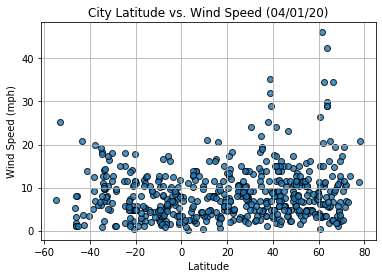

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


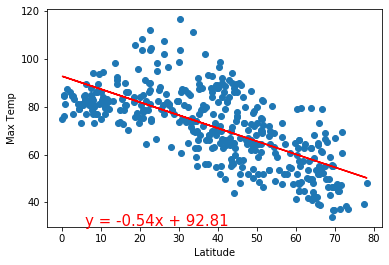

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


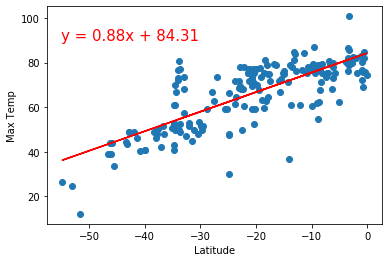

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


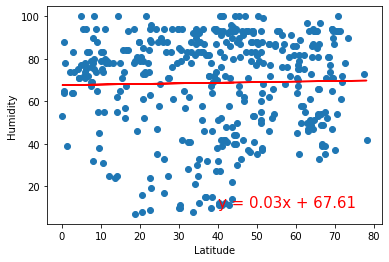

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


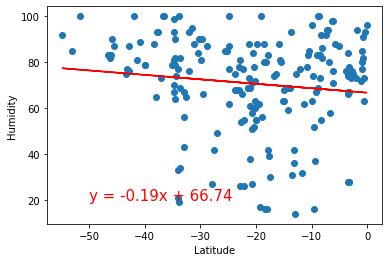

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


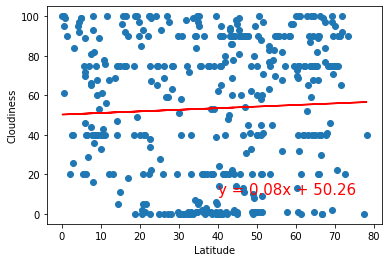

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


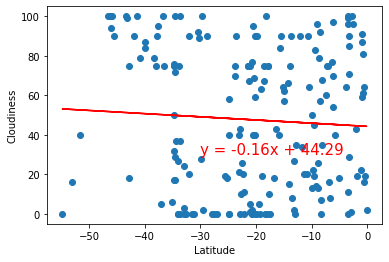

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


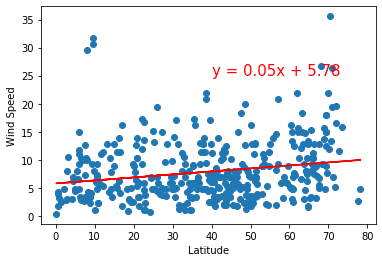

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


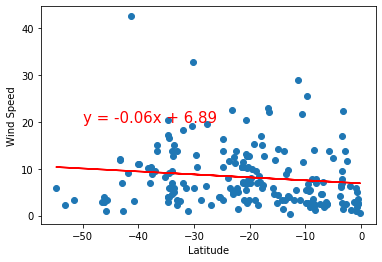